In [2]:
import numpy as np
import gym
from matplotlib import pyplot as plt

In [3]:
env = gym.make('CartPole-v0')

[2019-03-07 20:55:22,477] Making new env: CartPole-v0


In [4]:
#initialization
np.random.seed(42)
W = 2*np.random.randn(2, 4)-1
Q = np.zeros((2,1))
target = np.zeros((2,1))
alpha = 0.01
epsilon = 0.1
gamma = 0.999

In [5]:
scores = []
errors = []
for epoch in range(500):  
    score = 0.0
    state = env.reset()
    errorsum = 0
    for i in range(500):
        #forward propagation
        Q = np.dot(W,state.reshape(4,1)) 
        if np.random.rand() < epsilon :
            action = env.action_space.sample() #exploration
        else:
            action = np.argmax(Q)
        next_state, reward, done, info = env.step(action)
        qmax = np.max(np.dot(W,next_state.reshape(4,1)))
        target = np.copy(Q)        
        target[action] = reward + gamma*qmax
        #back propagation
        error = np.square(target-Q)/2
        derror = target - Q
        dW = np.dot(derror,state.reshape(1,4))
        W = np.clip((W +alpha * dW),-200,200)
        
        state = next_state
        score += reward
        errorsum += error
        #if done:
            #break
    #print(score)
    scores.append(score)
    errors.append(errorsum)

[2019-03-07 20:55:22,590] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:22,619] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:22,648] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:22,675] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:22,710] You are calling 'step()' even though this environment has already returned done = 

[2019-03-07 20:55:23,763] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:23,794] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:23,827] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:23,859] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:23,892] You are calling 'step()' even though this environment has already returned done = 

[2019-03-07 20:55:24,778] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:24,802] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:24,826] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:24,851] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[2019-03-07 20:55:24,873] You are calling 'step()' even though this environment has already returned done = 

In [6]:
#test
for i in range(5):
    state = env.reset()
    score = 0
    for step in range(500):
        env.render()
        Q = np.dot(W,state.reshape(4,1))
        action = np.argmax(Q)
        next_state, reward, done, info = env.step(action)
        print(state)
        print(action)
        state = next_state
        score += reward
    print(score)
env.close()

[-0.04877437 -0.03322779  0.02043277  0.03594729]
1
[-0.04943893  0.16159528  0.02115172 -0.2502195 ]
0
[-0.04620702 -0.03382224  0.01614733  0.04905935]
1
[-0.04688347  0.1610645   0.01712852 -0.23848553]
0
[-0.04366218 -0.03429791  0.01235881  0.05955063]
1
[-0.04434814  0.16064468  0.01354982 -0.22920752]
0
[-0.04113524 -0.03466825  0.00896567  0.06771851]
1
[-0.04182861  0.16032402  0.01032004 -0.22212227]
0
[-0.03862213 -0.03494391  0.00587759  0.07379806]
1
[-0.03932101  0.16009329  0.00735355 -0.21702468]
0
[-0.03611914 -0.03513301  0.00301306  0.07796877]
1
[-0.0368218   0.15994562  0.00457244 -0.213762  ]
0
[-0.03362289 -0.03524141  0.0002972   0.08035976]
1
[-0.03432772  0.15987628  0.00190439 -0.21222938]
0
[-0.03113019 -0.03527284 -0.0023402   0.08105367]
1
[-0.03183565  0.15988258 -0.00071912 -0.21236668]
0
[-0.028638   -0.03522909 -0.00496646  0.08008932]
1
[-0.02934258  0.15996371 -0.00336467 -0.21415639]
0
[-0.0261433  -0.03510998 -0.0076478   0.07746327]
1
[-0.0268455 

[-0.09159321  0.16343698  0.00080364 -0.29077694]
0
[-0.08832447 -0.03169642 -0.0050119   0.00215933]
0
[-0.0889584  -0.22674614 -0.00496871  0.29325674]
1
[-0.09349332 -0.0315537   0.00089642 -0.0009891 ]
1
[-0.09412439  0.16355538  0.00087664 -0.29338906]
0
[-0.09085329 -0.03157906 -0.00499114 -0.00042978]
0
[-0.09148487 -0.22662907 -0.00499974  0.29067421]
1
[-0.09601745 -0.03143619  0.00081375 -0.00358138]
0
[-0.09664617 -0.2265698   0.00074212  0.28935818]
1
[-0.10117757 -0.03145844  0.00652928 -0.00309059]
1
[-0.10180674  0.16356927  0.00646747 -0.29370632]
0
[-0.09853535 -0.03164429  0.00059334  0.00100932]
1
[-0.09916824  0.16346914  0.00061353 -0.29148634]
0
[-0.09589885 -0.03166155 -0.0052162   0.00139002]
0
[-0.09653209 -0.22670831 -0.0051884   0.29242262]
1
[-0.10106625 -0.03151276  0.00066006 -0.00189214]
0
[-0.10169651 -0.22664418  0.00062221  0.29099897]
1
[-0.10622939 -0.0315311   0.00644219 -0.00148765]
1
[-0.10686001  0.16349787  0.00641244 -0.29213104]
0
[-0.10359006

[-0.19716107 -0.03171105  0.00143769  0.00248202]
1
[-0.19779529  0.16339025  0.00148733 -0.28974695]
0
[-0.19452749 -0.03175288 -0.00430761  0.0034047 ]
0
[-0.19516254 -0.22681279 -0.00423951  0.29472541]
1
[-0.1996988  -0.03163065  0.00165499  0.00070843]
1
[-0.20033141  0.16346752  0.00166916 -0.29145187]
0
[-0.19706206 -0.03167819 -0.00415987  0.00175702]
0
[-0.19769563 -0.22674023 -0.00412473  0.29312456]
1
[-0.20223043 -0.03155972  0.00173776 -0.00085639]
1
[-0.20286163  0.16353727  0.00172063 -0.29299053]
0
[-0.19959088 -0.03160917 -0.00413918  0.00023457]
0
[-0.20022306 -0.22667152 -0.00413449  0.29160866]
1
[-0.20475649 -0.03149086  0.00169768 -0.00237536]
1
[-0.20538631  0.1636067   0.00165018 -0.29452216]
0
[-0.20211418 -0.03153873 -0.00424027 -0.00131925]
0
[-0.20274495 -0.22659962 -0.00426665  0.29002281]
1
[-0.20727694 -0.03141709  0.0015338  -0.00400271]
0
[-0.20790529 -0.226561    0.00145375  0.28916375]
1
[-0.21243651 -0.03145981  0.00723702 -0.00306032]
1
[-0.2130657 

[-0.27964519  0.16241489  0.00213069 -0.26823088]
0
500.0
[ 0.03943781  0.01067861 -0.04627077  0.02974553]
0
[ 0.03965138 -0.1837503  -0.04567585  0.307478  ]
0
[ 0.03597638 -0.37819265 -0.03952629  0.58541331]
1
[ 0.02841252 -0.18253999 -0.02781803  0.28054584]
1
[ 0.02476172  0.0129675  -0.02220711 -0.02077939]
0
[ 0.02502107 -0.18182905 -0.0226227   0.26481505]
1
[ 0.02138449  0.01360837 -0.0173264  -0.03491657]
0
[ 0.02165666 -0.18126089 -0.01802473  0.25224973]
1
[ 0.01803144  0.01411374 -0.01297974 -0.0460636 ]
0
[ 0.01831372 -0.1808197  -0.01390101  0.24249601]
1
[ 0.01469732  0.01449802 -0.00905109 -0.05453904]
0
[ 0.01498728 -0.18049299 -0.01014187  0.23527451]
1
[ 0.01137742  0.01477239 -0.00543638 -0.06059015]
0
[ 0.01167287 -0.1802712  -0.00664818  0.23037262]
1
[ 0.00806745  0.01494512 -0.00204073 -0.06439994]
0
[ 0.00836635 -0.18014751 -0.00332873  0.22763843]
1
[ 0.0047634   0.01502185  0.00122404 -0.06609264]
0
[ 5.06383533e-03 -1.80117629e-01 -9.78112249e-05  2.269762

[ 1.15581617e-02  2.06991109e-01  1.32581069e-05 -2.89228683e-01]
0
[ 0.01569798  0.01186897 -0.00577132  0.00345842]
0
[ 0.01593536 -0.18316974 -0.00570215  0.29431486]
1
[ 0.01227197  0.01203304  0.00018415 -0.00016097]
1
[ 1.25126293e-02  2.07152350e-01  1.80930619e-04 -2.92785794e-01]
0
[ 1.66556763e-02  1.20278199e-02 -5.67478525e-03 -4.58092328e-05]
0
[ 0.01689623 -0.18301229 -0.0056757   0.29084127]
1
[ 0.01323599  0.01219013  0.00014112 -0.00362629]
0
[ 1.34797895e-02 -1.82933845e-01  6.85979798e-05  2.89101156e-01]
1
[ 0.00982111  0.01218713  0.00585062 -0.00356014]
1
[ 0.01006486  0.20722469  0.00577942 -0.29439139]
0
[ 0.01420935  0.01202082 -0.00010841  0.00010866]
1
[ 1.44497653e-02  2.07144323e-01 -1.06236275e-04 -2.92608469e-01]
0
[ 1.85926518e-02  1.20238869e-02 -5.95840566e-03  4.09500156e-05]
0
[ 0.01883313 -0.18301211 -0.00595759  0.29083799]
1
[ 0.01517289  0.01219428 -0.00014083 -0.00371792]
0
[ 1.54167730e-02 -1.82925648e-01 -2.15185375e-04  2.88920568e-01]
1
[ 0.

[ 0.0444768   0.01207353  0.00537521 -0.00105414]
1
[ 0.04471827  0.20711798  0.00535413 -0.29203628]
0
[ 0.04886063  0.0119201  -0.0004866   0.00233045]
1
[ 0.04909903  0.20704903 -0.00043999 -0.29050597]
0
[ 0.05324001  0.01193335 -0.00625011  0.00203816]
0
[ 0.05347868 -0.18309841 -0.00620935  0.29274256]
1
[ 0.04981671  0.01211152 -0.0003545  -0.00189222]
0
[ 0.05005894 -0.18300534 -0.00039234  0.29067883]
1
[ 0.04639883  0.0121222   0.00542124 -0.00212781]
1
[ 0.04664128  0.20716598  0.00537868 -0.29309535]
0
[ 0.0507846   0.01196776 -0.00048323  0.00127908]
1
[ 0.05102395  0.20709664 -0.00045764 -0.29155627]
0
[ 0.05516588  0.01198122 -0.00628877  0.00098228]
0
[ 0.05540551 -0.18304998 -0.00626912  0.29167441]
1
[ 0.05174451  0.01216079 -0.00043564 -0.00297911]
0
[ 0.05198772 -0.18295491 -0.00049522  0.28956634]
1
[ 0.04832863  0.0121741   0.00529611 -0.00327274]
1
[ 0.04857211  0.2072197   0.00523065 -0.29427998]
0
[ 5.27165022e-02  1.20235663e-02 -6.54946384e-04  4.80152678e-05

0
[ 0.08855604 -0.18292378 -0.00071699  0.28887992]
1
[ 0.08489756  0.01220838  0.00506061 -0.00402905]
1
[ 0.08514173  0.2072574   0.00498003 -0.29511101]
0
[ 0.08928688  0.0120648  -0.00092219 -0.00086162]
0
[ 0.08952817 -0.18304391 -0.00093942  0.2915302 ]
1
[ 0.08586729  0.01209142  0.00489118 -0.00144886]
1
[ 0.08610912  0.20714289  0.00486221 -0.29258456]
0
[ 0.09025198  0.01195195 -0.00098949  0.00162787]
0
[ 0.09049102 -0.1831558  -0.00095693  0.29399844]
1
[0.0868279  0.01197978 0.00492304 0.00101387]
1
[ 0.0870675   0.20703079  0.00494332 -0.29011173]
0
[ 0.09120812  0.0118387  -0.00085892  0.00412616]
1
[ 0.09144489  0.20697295 -0.00077639 -0.28882764]
0
[ 0.09558435  0.01186208 -0.00655295  0.00361032]
0
[ 0.09582159 -0.18316528 -0.00648074  0.29421853]
1
500.0
[-0.00042848  0.01403158  0.02501635  0.01332929]
1
[-1.47846387e-04  2.08786000e-01  2.52829361e-02 -2.71356888e-01]
0
[0.00402787 0.01331257 0.0198558  0.02919195]
1
[ 0.00429412  0.20814423  0.02043964 -0.25716072

0
[ 0.09950413 -0.18029063 -0.00094166  0.28836759]
1
[ 0.09589831  0.01484473  0.00482569 -0.00461218]
1
[ 0.09619521  0.20989715  0.00473345 -0.29576864]
0
[ 0.10039315  0.01470804 -0.00118193 -0.00159663]
0
[ 0.10068731 -0.18039695 -0.00121386  0.29071315]
1
[ 0.09707937  0.01474229  0.0046004  -0.00235236]
1
[ 0.09737422  0.20979797  0.00455336 -0.29358026]
0
[ 0.10157018  0.01461139 -0.00131825  0.00053524]
0
[ 0.10186241 -0.18049163 -0.00130754  0.29280196]
1
[ 0.09825257  0.01464894  0.0045485  -0.00029307]
1
[ 0.09854555  0.20970537  0.00454263 -0.29153742]
0
[ 0.10273966  0.01451894 -0.00128811  0.00257473]
0
[ 0.10303004 -0.18058451 -0.00123662  0.29485096]
1
[0.09941835 0.01455505 0.0046604  0.00177828]
1
[ 0.09970945  0.20960985  0.00469597 -0.2894306 ]
0
[ 0.10390165  0.01442125 -0.00109265  0.00472968]
1
[ 0.10419007  0.20955886 -0.00099805 -0.28829779]
0
[ 0.10838125  0.01445115 -0.00676401  0.00407019]
0
[ 0.10867027 -0.18057314 -0.0066826   0.29461134]
1
[ 0.10505881  

1
[ 0.14422841  0.20980437  0.00411029 -0.29372057]
0
[ 0.14842449  0.01462406 -0.00176412  0.00025584]
0
[ 0.14871697 -0.18047255 -0.001759    0.29238165]
1
[ 0.14510752  0.01467444  0.00408863 -0.00085553]
1
[ 0.14540101  0.20973752  0.00407152 -0.29224564]
0
[ 0.14959576  0.01455775 -0.00177339  0.00171861]
0
[ 0.14988692 -0.18053872 -0.00173902  0.29384148]
1
[0.14627614 0.01460798 0.00413781 0.0006106 ]
1
[ 0.1465683   0.20967034  0.00415002 -0.29076393]
0
[ 0.15076171  0.01448946 -0.00166526  0.00322497]
0
[ 0.1510515  -0.18060857 -0.00160076  0.29538202]
1
[0.14743933 0.01453617 0.00430688 0.00219467]
1
[ 0.14773005  0.20959609  0.00435078 -0.28912628]
0
[ 0.15192197  0.01441237 -0.00143175  0.00492566]
1
[ 0.15221022  0.20955482 -0.00133324 -0.28820866]
0
[ 0.15640132  0.01445191 -0.00709741  0.00405348]
0
[ 0.15669035 -0.18056754 -0.00701634  0.29448866]
1
[ 0.153079    0.01465374 -0.00112657 -0.00039883]
0
[ 0.15337208 -0.18045204 -0.00113454  0.29192844]
1
[ 0.14976304  0.01

0
[ 2.00897988e-01  1.46417281e-02 -7.19150911e-03 -1.33940865e-04]
0
[ 0.20119082 -0.18037635 -0.00719419  0.29027133]
1
[ 0.1975833   0.01484744 -0.00138876 -0.00467185]
0
[ 0.19788024 -0.18025457 -0.0014822   0.28757258]
1
[ 0.19427515  0.01488849  0.00426925 -0.00557745]
1
[ 0.19457292  0.20994896  0.0041577  -0.29691033]
0
[ 0.1987719   0.01476798 -0.0017805  -0.00291903]
0
[ 0.19906726 -0.18032839 -0.00183888  0.28920159]
1
[ 0.19546069  0.01481974  0.00394515 -0.00406073]
1
[ 0.19575709  0.20988489  0.00386393 -0.29549631]
0
[ 0.19995479  0.01470806 -0.00204599 -0.00159727]
0
[ 0.20024895 -0.18038449 -0.00207794  0.29043942]
1
[ 0.19664126  0.01476703  0.00373085 -0.00289814]
1
[ 0.1969366   0.20983528  0.00367289 -0.29440161]
0
[ 0.2011333   0.01466116 -0.00221514 -0.00056257]
0
[ 0.20142653 -0.18042895 -0.0022264   0.29142063]
1
500.0
[-0.02099495 -0.0436911  -0.03808413  0.01280632]
0
[-0.02186878 -0.23824677 -0.037828    0.29323418]
0
[-0.02663371 -0.43280954 -0.03196332  0.

0
[-0.18464213 -0.04391659 -0.00319838  0.01777423]
0
[-0.18552046 -0.23899252 -0.0028429   0.30944631]
1
[-0.19030031 -0.04383018  0.00334603  0.01586817]
1
[-0.19117691  0.15124362  0.00366339 -0.27575717]
0
[-0.18815204 -0.0439304  -0.00185175  0.01807894]
0
[-0.18903065 -0.23902575 -0.00149017  0.31017704]
1
[-0.19381116 -0.0438826   0.00471337  0.01702453]
1
[-0.19468882  0.15117144  0.00505386 -0.27416755]
0
[-0.19166539 -0.04402225 -0.00042949  0.02010508]
1
[-1.92545833e-01  1.51105856e-01 -2.73908504e-05 -2.72713327e-01]
0
[-0.18952372 -0.0440157  -0.00548166  0.01996096]
0
[-0.19040403 -0.23905862 -0.00508244  0.31090933]
1
[-0.1951852  -0.04386462  0.00113575  0.0166279 ]
1
[-0.19606249  0.15124102  0.00146831 -0.27569647]
0
[-0.19303767 -0.04390185 -0.00404562  0.0174492 ]
0
[-0.19391571 -0.23896555 -0.00369664  0.30885294]
1
[-0.19869502 -0.04379112  0.00248042  0.01500649]
1
[-0.19957084  0.15129517  0.00278055 -0.2768928 ]
0
[-0.19654494 -0.04386634 -0.00275731  0.016665

[-2.88778755e-01  1.50907035e-01  2.06187470e-04 -2.68327124e-01]
0
[-0.28576061 -0.04421786 -0.00516036  0.02442083]
0
[-0.28664497 -0.23926543 -0.00467194  0.31547115]
1
[-0.29143028 -0.04407724  0.00163748  0.02131852]
1
[-0.29231183  0.15102119  0.00206385 -0.27084731]
0
[-0.2892914  -0.04413015 -0.00335309  0.02248585]
0
[-0.290174   -0.23920386 -0.00290337  0.31410895]
1
[-0.29495808 -0.04404067  0.0033788   0.02051181]
1
[-0.29583889  0.15103267  0.00378904 -0.27110315]
0
[-0.29281824 -0.04414315 -0.00163302  0.02277244]
0
[-0.2937011  -0.23924164 -0.00117757  0.31493969]
1
[-0.29848594 -0.04410294  0.00512122  0.02188562]
1
[-0.299368    0.1509452   0.00555893 -0.26917711]
0
[-2.96349092e-01 -4.42556394e-02  1.75390573e-04  2.52539417e-02]
1
[-0.2972342   0.1508638   0.00068047 -0.26737364]
0
[-0.29421693 -0.04426786 -0.004667    0.02552383]
0
[-0.29510229 -0.23932257 -0.00415653  0.31673062]
1
[-0.29988874 -0.04414166  0.00217809  0.02273977]
1
[-0.30077157  0.15094898  0.0026

[-0.37969025  0.15069721  0.0013255  -0.26369903]
0
[-0.3766763  -0.04444363 -0.00394848  0.02940168]
0
[-0.37756518 -0.23950874 -0.00336045  0.3208362 ]
1
[-0.38235535 -0.04433909  0.00305628  0.02709542]
1
[-0.38324213  0.1507389   0.00359818 -0.26462165]
0
[-0.38022736 -0.04443423 -0.00169425  0.029194  ]
0
[-0.38111604 -0.23953184 -0.00111037  0.32134189]
1
[-0.38590668 -0.04439409  0.00531647  0.028309  ]
1
[-0.38679456  0.15065121  0.00588265 -0.26269179]
0
[-0.38378153 -0.04455421  0.00062881  0.03184077]
1
[-0.38467262  0.15055872  0.00126563 -0.26064369]
0
[-0.38166144 -0.04458128 -0.00394724  0.03243816]
0
[-0.38255307 -0.2396464  -0.00329848  0.32387308]
1
[-0.387346   -0.04447764  0.00317898  0.03015178]
1
[-0.38823555  0.15059858  0.00378202 -0.26152645]
0
[-0.38522358 -0.04457716 -0.00144851  0.03234696]
1
[-0.38611512  0.15056554 -0.00080157 -0.26079263]
0
[-0.38310381 -0.04454496 -0.00601743  0.03163736]
0
[-0.38399471 -0.23958011 -0.00538468  0.32241567]
1
[-0.38878631

[ 0.19801218 -0.15803695 -0.00225207  0.29365472]
1
[0.19485144 0.03711704 0.00362102 0.00026237]
1
[ 0.19559378  0.23218687  0.00362627 -0.29127589]
0
[ 0.20023752  0.0370134  -0.00219925  0.00254851]
0
[ 0.20097779 -0.15807694 -0.00214828  0.29453674]
1
[0.19781625 0.03707557 0.00374245 0.00117705]
1
[ 0.19855776  0.23214365  0.003766   -0.29032274]
0
[ 0.20320063  0.0369682  -0.00204046  0.00354556]
0
[ 0.20394    -0.15812443 -0.00196955  0.29558399]
1
[0.20077751 0.03702555 0.00394213 0.00228055]
1
[ 0.20151802  0.23209074  0.00398774 -0.28915598]
0
[ 0.20615984  0.03691215 -0.00179538  0.00478197]
1
[ 0.20689808  0.23205981 -0.00169974 -0.28846688]
0
[ 0.21153927  0.03696214 -0.00746908  0.00367948]
0
[ 0.21227852 -0.15805191 -0.00739549  0.2939965 ]
1
[ 0.20911748  0.0371747  -0.00151556 -0.00100966]
0
[ 0.20986097 -0.15792548 -0.00153575  0.29119471]
1
[ 0.20670246  0.03721833  0.00428814 -0.00197218]
1
[ 0.20744683  0.23227852  0.0042487  -0.29329906]
0
[ 0.2120924   0.03709625

[ 0.32207839  0.03727342 -0.00347814 -0.00318734]
0
[ 0.32282386 -0.15779848 -0.00354189  0.28839617]
1
[ 0.31966789  0.0373738   0.00222603 -0.00540173]
1
[ 0.32041537  0.23246375  0.002118   -0.29738149]
0
[ 0.32506464  0.03731167 -0.00382963 -0.00403133]
0
[ 0.32581088 -0.15775515 -0.00391026  0.28744084]
1
[ 0.32265577  0.03742235  0.00183856 -0.00647278]
1
[ 0.32340422  0.23251789  0.0017091  -0.29857505]
0
[ 0.32805458  0.03737161 -0.0042624  -0.00535359]
0
[ 0.32880201 -0.15768895 -0.00436947  0.28598145]
1
[ 0.32564823  0.03749504  0.00135016 -0.00807636]
1
[ 0.32639813  0.23259761  0.00118863 -0.30033299]
0
[ 0.33105009  0.03745873 -0.00481803 -0.00727543]
0
[ 0.33179926 -0.15759379 -0.00496354  0.28388346]
1
[ 0.32864738  0.0375986   0.00071413 -0.01036079]
1
[ 0.32939936  0.2327103   0.00050692 -0.30281831]
0
[ 0.33405356  0.03758113 -0.00554945 -0.00997556]
0
[ 0.33480519 -0.15746079 -0.00574896  0.28095129]
1
[ 3.31655969e-01  3.77426886e-02 -1.29934658e-04 -1.35392766e-02

[ 0.39075395  0.03852737 -0.00267864 -0.03084968]
0
[ 0.39152449 -0.15655606 -0.00329564  0.2609869 ]
1
[ 0.38839337  0.03861278  0.0019241  -0.03273369]
1
[ 0.38916563  0.23370708  0.00126943 -0.32480892]
0
[ 0.39383977  0.03856708 -0.00522675 -0.03172594]
0
[ 0.39461111 -0.15647953 -0.00586127  0.25930332]
1
[ 0.39148152  0.03872561 -0.0006752  -0.03522255]
0
[ 0.39225603 -0.15638666 -0.00137965  0.25724726]
1
[ 0.3891283   0.03875497  0.00376529 -0.03587051]
1
[ 0.3899034   0.23382272  0.00304788 -0.32736307]
0
[ 0.39457985  0.03865751 -0.00349938 -0.03372054]
0
[ 0.395353   -0.15641409 -0.00417379  0.25785624]
1
[ 0.39222472  0.0387672   0.00098333 -0.03614023]
0
[ 3.93000067e-01 -1.56368834e-01  2.60528400e-04  2.56852783e-01]
1
[ 0.38987269  0.0387494   0.00539758 -0.03574796]
1
[ 0.39064768  0.23379353  0.00468262 -0.32672302]
0
[ 0.39532355  0.03860523 -0.00185184 -0.03256708]
0
[ 0.39609565 -0.15649012 -0.00250318  0.259531  ]
1
[ 0.39296585  0.03866748  0.00268744 -0.03394041

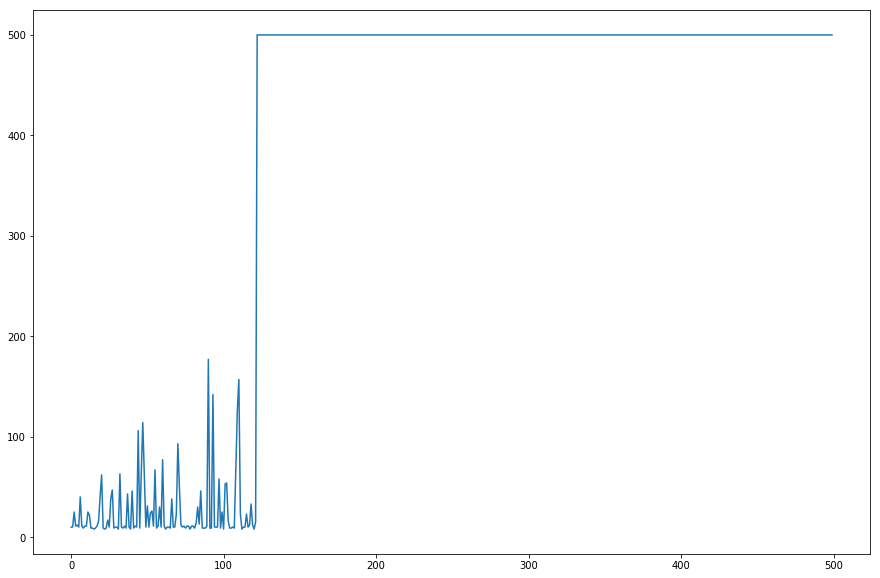

In [6]:
#score plot
plt.figure(figsize=(15,10))
plt.plot(scores)
plt.show()

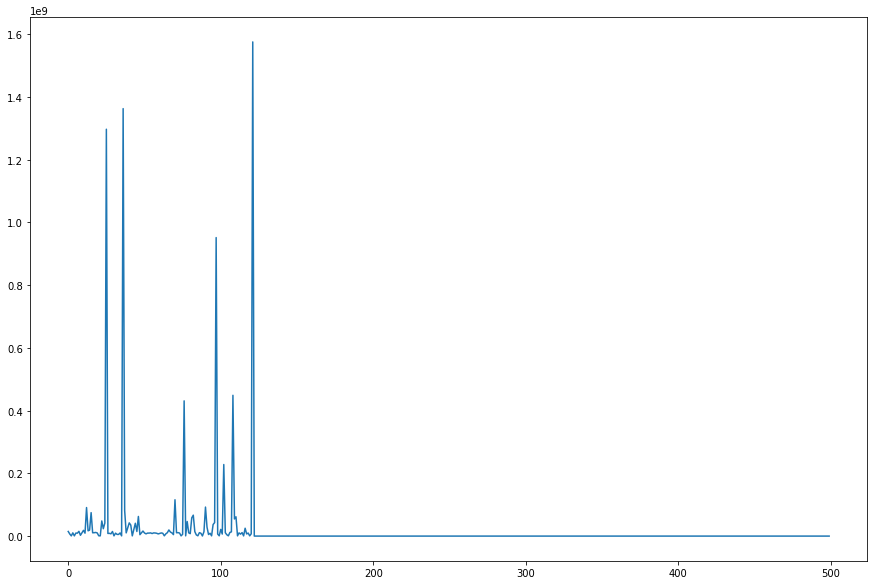

In [7]:
#error plot
plt.figure(figsize=(15,10))
plt.plot(np.linalg.norm(errors,axis=1))
plt.show()

In [8]:
#learned weights
W

array([[-144.55853856, -199.98670285, -199.99961002, -138.16834707],
       [-105.35927387, -199.90664133,  -10.20985604, -127.81208407]])